In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.data_utils.generators import SeismicGenerator, SequencePathGenerator
from scripts.data_utils.grid_utils import blockshaped, unblockshaped, plot_embeddings

# declare parent dir name 
dirname = sys.path[0] # parent directory

"""
Representation Learning with Contrastive Predictive Coding
The goal of unsupervised representation learning is to capture semantic information about the world,
recognizing patterns in the data without using annotations. 
This paper presents a new method called Contrastive Predictive Coding (CPC) that can do so across multiple applications. 
The main ideas of the paper are:
* Contrastive: it is trained using a contrastive approach, that is,
  the main model has to discern between *right* and *wrong* data sequences.
* Predictive: the model has to predict future patterns given the current context.
* Coding: the model performs this prediction in a latent space, transforming code vectors 
  into other code vectors (in contrast with predicting high-dimensional data directly).

CPC has to predict the next item in a sequence using only an embedded representation of the data, 
xrovided by an encoder. In order to solve the task, this encoder has to learn a meaningful representation 
of the data space. After training, this encoder can be used for other downstream tasks like supervised classification.




The cpc article descibes the following pattern:

Pre-processing:
-(own) from a random iline/xline/tline > 256*256 we extract pathces of 256x256 using sklearn image.extract_patches_2d
-from a 256x256 image we extract a 7x7 grid of 64x64 crops
with 32 pixels overlap. 

-(TODO)Simple data augmentation proved helpful on both the 256x256 images and the
64x64 crops. 
-(DONE)The 256x256 images are randomly cropped from a 300x300 image
- horizontally flipped with a probability of 50% and converted to greyscale. 
-For each of the 64x64 crops we randomly take
a 60x60 subcrop and pad them back to a 64x64 image.
-MNIST example uses RGB channels. Seimsic is grayscale. Would it help to pick and generate x attributes as channels
Encoder:
-(DONE)Each crop is then encoded by the ResNet-v2-101 encoder
- (DONE)We use the outputs from the third residual
block, and spatially mean-pool to get a single 1024-d vector per 64x64 patch. This results in a
7x7x1024 tensor.
"""

# change the patch_size and stride to get different girds. if stride is less than patch_size--> we have overlap on each grid cell
image_size = 256
patch_size = 64
stride=32


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


os.path.exists(filename) False /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy
No data found at /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy. Generating new from seimsic cube
651 951 462
data.shape, label.shape :  (651, 951, 462) (651,)
Splits 0.9 0.9
train/testsplit:  (585, 951, 462) (66, 951, 462) (585,) (66,)
train/val split:  (526, 951, 462) (59, 951, 462)
Sequence of indexes used as labels for train, val and test:  525 584 650
splits plot 0.81 0.9


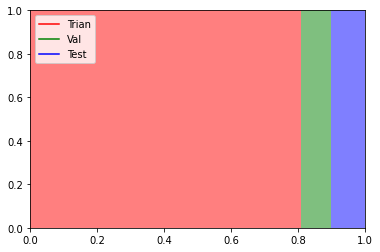

before cropped_labels  (2,) [431 341]
cropped_batch  (4, 256, 256) 2
0 2
2 4
after cropped_labels  (4, 1) [[431]
 [431]
 [341]
 [341]]
new_batch_size 4
plotting batches... (196, 64, 64, 3) (196, 1)
SeismicGenerator outputs:  (196, 64, 64, 3) (196, 1)
index 146


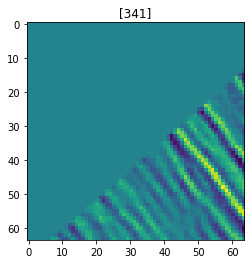

index 17


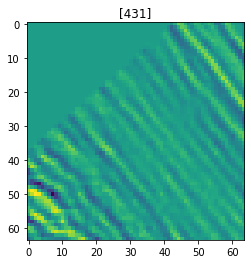

index 104


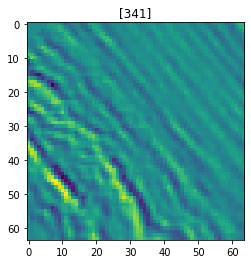

index 86


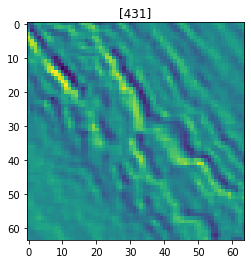

index 128


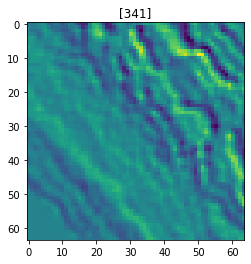

index 109


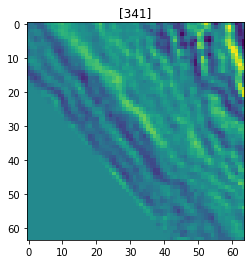

index 69


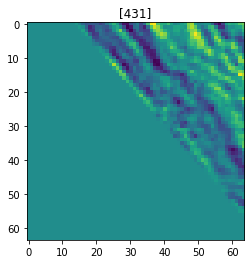

index 177


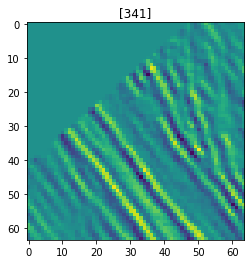

index 169


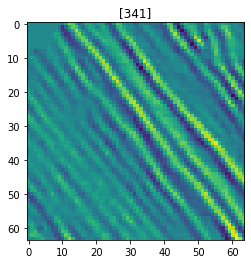

index 38


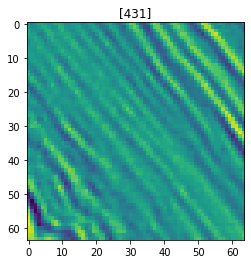

In [9]:
#We create a generator that extracts 256*256  images from the seismic in all directions
num_crops = 2
batch_size=2 # actually becomes 3 images * 10 crop on each (that all have augmentation)
ag = SeismicGenerator(batch_size=batch_size, image_size=image_size,patch_size=patch_size, stride=stride,  subset="train",num_crops=num_crops, augmentation=True)
# Using for loop to print out siemsc form generator
for (x, y) in ag:
    print("SeismicGenerator outputs: ", x.shape, y.shape)
    #plotting a random patch 
    for i in range(10):
        random_choice = np.random.choice(y.shape[0], 1)[0]
        print("index", random_choice)
        img = x[i,:,:,0].T
        plt.imshow(img)
        plt.title(str(y[random_choice]))
        plt.show()
    break;
    

before cropped_labels  (2,) [ 79 522]
cropped_batch  (4, 256, 256) 2
0 2
2 4
after cropped_labels  (4, 1) [[ 79]
 [ 79]
 [522]
 [522]]
new_batch_size 4
plotting batches... (196, 64, 64, 3) (196, 1)
SeismicGenerator outputs:  (196, 64, 64, 3) (196, 1)


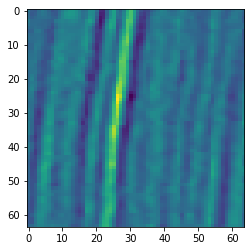

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


skip_every 7 4 2 [0, 2, 4, 6, 14, 16, 18, 20, 28, 30, 32, 34, 42, 44, 46, 48] (16, 64, 64, 3)
unblockshaped 16 64 64


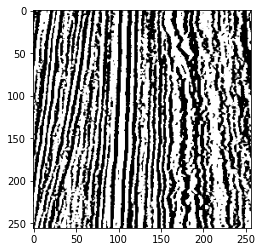

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


skip_every 7 4 2 [0, 2, 4, 6, 14, 16, 18, 20, 28, 30, 32, 34, 42, 44, 46, 48] (16, 64, 64, 3)
unblockshaped 16 64 64
unblockshaped 16 64 64


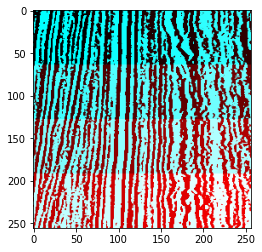

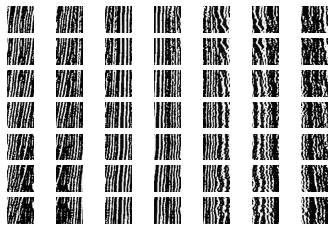

In [10]:
# Using for loop to print out siemsc form generator
for (x, y) in ag:
    print("SeismicGenerator outputs: ", x.shape, y.shape)
    #plotting top left patch 
    plt.imshow(x[0,:,:,0])
    plt.show()
    # plotting original image 
    plot_embeddings(x, patch_size, stride, image_size=image_size, stitched=True, channels=3)
    # plotting orignal image with patches highlighted 
    plot_embeddings(x, patch_size, stride, image_size=image_size, stitched=True, channels=3,color_patches=True)

    # plotting patches derived from the image 
    plot_embeddings(x.reshape(x.shape[0], x.shape[1]*x.shape[2],x.shape[3]), patch_size, stride,image_size=image_size, channels=3)
    break

In [3]:
#TODO FIX SO ONE CAN INPUT PARAMS TO GENERATORS
#REMOVE UNNECCESARRY IMAGE SIZE ETC. 
# CROP DYNAMICLY FOR 64*64 AND 32*32 AND 16*16
# CHOSE OVERLAP DYNAMICLY

os.path.exists(filename) False /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy
No data found at /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy. Generating new from seimsic cube
651 951 462
data.shape, label.shape :  (651, 951, 462) (651,)
Splits 0.9 0.9
train/testsplit:  (585, 951, 462) (66, 951, 462) (585,) (66,)
train/val split:  (526, 951, 462) (59, 951, 462)
Sequence of indexes used as labels for train, val and test:  525 584 650
splits plot 0.81 0.9


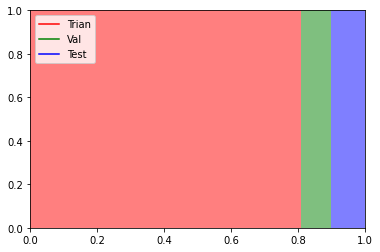

generator, x, y, labels (210, 3, 64, 64, 3) (210, 4, 64, 64, 3) (210,)


In [70]:
# For training we want to provide  a column consisting of "terms"  number of patches to use to predict on "predictive_terms" sumber of patches. 
# This is used to converge on the autoregressive part  
num_crops=10
batch_size=3  # actually becomes 3 images * 10 crop on each (that all have augmentation)
seq_ag = SeismicGenerator(batch_size=batch_size, image_size=image_size,patch_size=patch_size, stride=stride,  subset="train",num_crops=num_crops, augmentation=True, sequence=True, verbose=False)
for (x, y), labels in seq_ag:
    print("generator, x, y, labels", x.shape, y.shape, labels.shape)
    
    #plot_sequences(x, y, labels, output_path=r'resources/batch_sample_sorted.png')
    break


In [13]:
# NOW WE SPLIT EACH. BATCH INTO 50/50 PROSENTAGE POSITIVE/NEGATIVE. NOT THAT MEANS THE FIRST 50% FULL IMAGES
#OF THE BATCH BECOMES POSTIVEIE. shPUDL MAYBE SHIFFLE SOME COULMS SO THAT COLUMSN WITHIN THE IMAGE ARE 50%50 POS/NEG?
#TODO